# Skriftlig innlevering 6, Oppgave 2-3 (av 3)

## Oppgave 2

Anta at man har gjennomført en medisinsk studie for å vurdere om en ny medisin for en bestemt sykdom er bedre enn den tradisjonelle medisinen som har vært benyttet for denne sykdommen. Det var $n=15$ pasienter som deltok i studien. Av disse $n$ pasientene ble $m=7$ tilfeldig trukket ut og disse $m$ pasientene ble gitt den nye medisinen. De øvrige $n-m=8$ pasientene fikk den gamle medisinen.

Effekten av behandlingen (medisinen) kan måles ved hjelp av en blodprøve. Vi skal i denne oppgaven anta at en lav blodprøveverdi er en indikasjon på at medisinen som er gitt har hatt en god effekt. Jo lavere blodprøveverdien er, jo bedre har effekten av medisinen vært.

I denne oppgaven ønsker vi å bruke følgende observerte blodprøveverdier til å vurdere om det er grunnlag for å påstå at den nye medisinen er mer effektiv enn den gamle.


Tradisjonell medisin | 0.189 | 0.743 | 0.605 | 0.044 | 0.091 | 0.045 | 0.532 | 0.642 |
:-----------|---:|---:|---:|---:|---:|---:|---:|---:|
__Ny medisin__ | __0.397__ | __0.583__ | __0.355__ | __0.054__ | __0.155__ | __0.066__ | __0.099__ | |

Vi skal formulere problemet som en hypotesetest og som testobservator skal vi benytte gjennomsnittet av observerte blodprøveverdier for pasienter som fikk ny medisin minus gjennomsnittet av observerte blodprøveverdier for pasienter som fikk den tradisjonelle medisinen.


### Deloppgave a)

For å få et første inntrykk at de observerte verdiene, lag et boksplott for observerte blodprøveverdiene for pasientene som fikk tradisjonell medisin, og et boksplott for observerte blodprøveverdier for pasienter som fikk ny medisin. <em>Hint: Jobben blir gjort ved å kjøre koden under. Du trenger ikke endre på den gitte koden.</em>

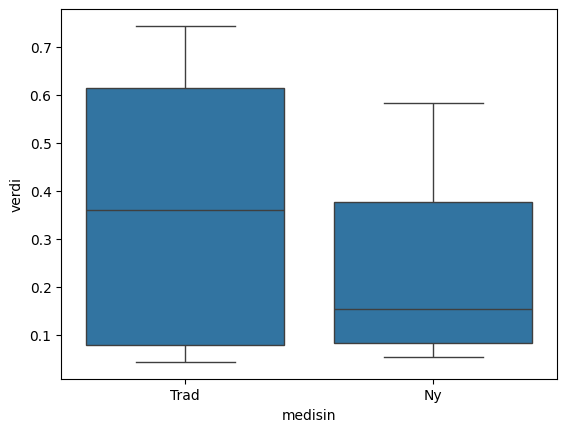

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

x = [0.189,0.743,0.605,0.044,0.091,0.045,0.532,0.642,
     0.397,0.583,0.355,0.054,0.155,0.066,0.099]
data = pd.DataFrame({'verdi': x, 'medisin': 
                     ['Trad', 'Trad', 'Trad', 'Trad', 'Trad', 'Trad', 'Trad', 'Trad', 
                      'Ny', 'Ny', 'Ny', 'Ny', 'Ny', 'Ny', 'Ny']})
sns.boxplot(x='medisin',y='verdi',data=data)
plt.show()

Ut fra hva du ser i disse to boksplottene, tenker du at det er grunnlag for å påstå at den nye medisinen gir bedre effekt enn den tradisjonelle? Gi argumenter for ditt svar.

#### svar a)
Det ser ut til at den nye har bedre effekt enn den gamle, både fordi den har lavere forventningsverdi samt lavere varians.

### Deloppgave b)

Formuler nullhypotese $H_0$ og alternativ hypotese $H_1$ for problemstillingen beskrevet i innledningen til oppgaven.

Bestem hvilken beslutningsregel det er rimelig å bruke. <em>Merk: Du trenger ikke å finne kritisk verdi, bare bestemme om man skal forkaste $H_0$ når testobservatoren er stor nok, om man skal forkaste $H_0$ når testobservatoren er liten nok, eller om man bør ha et tosidig forkastningskriterium.</em>

Skriv og kjør python-kode som bruker stokastiske simulering til å estimere p-verdien i en permutasjonstest når observasjonene er som gitt over. Benytt gjerne $m=10\, 000$ simuleringer for å estimere p-verdien. <em>Hint: Koden under regner ut observert verdi av testobservatoren og <b>en</b> simulert verdi av denne. Du er nødt til å modifisere denne koden slik at den gjør det som det spørres om.</em>

$H_0$: mu = $mu_0$,  $H_1$:mu < $mu_0$

ettersom observatoren sjekker differansen mellom de nye blodprøvene og de gamle blodprøvene
forkaster vi $H_0$ dersom testobservatoren er liten nok



In [40]:
def testStatistic(x,nTrad):  
    #x inneholder alle observerte verdier, de nTrad 
    #første av disse er for pasienter som som fikk tradisjonell medisin    
    
    #gjennomsnitt av observerte verdier for pasienter som fikk tradisjonell medisin:
    meanTrad = np.mean(x[0:(nTrad+1)])
    #gjennomsnitt av observerte verdier for pasienter som fikk by medisin
    meanNew = np.mean(x[(nTrad+1):]) 
    
    return meanNew - meanTrad  #returnerer differansen


from random import sample

# regner ut observert verdi av testobservatoren:
statisticObserved = testStatistic(x = x,nTrad = 8)  
print('Observert verdi: ',statisticObserved)

# genererer tilfeldig en permutasjon av (alle) elementene i lista x:
xPermuted = sample(x,len(x))  
# regner ut simulert verdi av testobservatoren
statisticSimulated = testStatistic(xPermuted,8)
print('Simulert verdi: ',statisticSimulated)

def genereate_p_value(n):
    extreme = 0
    for i in range(n):
        perm = sample(x,len(x))
        if testStatistic(perm,8) < statisticObserved: # sjekker om den genererte permutasjonen er mindre enn den observerte verdien
            extreme += 1
    return extreme/n

print(f"Permutation test p-value: {(genereate_p_value(10000))}") 
# ^ sansynligheten for å få den observerte verdien eller lavere, gitt at H_0 er sann




Observert verdi:  -0.14666666666666667
Simulert verdi:  -0.16944444444444448
Permutation test p-value: 0.135


## Oppgave 3

Anta at vi har observert observasjonspar $(x_1,y_1),(x_2,y_2),\ldots,(x_n,y_n)$ og at vi ønsker å tilpasse disse til en regresjonsmodell på formen

$Y_i = a x_i + \varepsilon_i$,

der $\varepsilon_1,\varepsilon_2,\ldots,\varepsilon_n$ antas uavhengige og identisk normalfordelt med forventningsverdi lik null og varians lik $\sigma^2$. Vi har dermed at $Y_1,Y_2,\ldots,Y_n$ er uavhengige stokastiske variabler, og $Y_i\sim N(ax_i,\sigma^2)$.

Merk at vi altså betrakter de observerte verdiene $y_1,y_2,\ldots,y_n$ som realisasjoner av stokastiske variabler $Y_1,Y_2,\ldots,Y_n$, mens verdiene $x_1,x_2,\ldots,x_n$ betrakter vi som kjente tall.

Modellen har to parametre, $a$ og $\sigma^2$, og vi ønsker å estimere verdien til disse fra de observerte parene $(x_1,y_1),(x_2,y_2),...,(x_n,y_n)$.

### Deloppgave a)

Finn uttrykk for rimelighetsfunksjonen $L(a,\sigma^2)$ for situasjonen over.

Bruk $L(a,\sigma^2)$ til å finne uttrykk for log-rimelighetsfunksjonen $\ell (a,\sigma^2)$.

Finn sannsynlighetsmaksimeringsestimatorene for $a$ og $\sigma^2$ og vis at disse kan skrives på formen

$$\hat{a}=\frac{\sum_{i=1}^n x_iY_i}{\sum_{i=1}^n x_i^2},\,\,\,\, 
\hat{\sigma}^2 = \frac{1}{n}\sum_{i=1}^n \left(Y_i-\hat{a}x_i\right)^2.$$

### Deloppgave b)

Finn forventningsverdi og varians for estimatoren $\hat{a}$. Du skal forenkle uttrykkene så mye det lar seg gjøre.

Er $\hat{a}$ forventningsrett? Begrunn svaret.

#### Her er deloppgave b) slutt.

Det kan vises (NB: du trenger ikke vise det) at 

$\sum_{i=1}^n \left(\frac{Y_i-\hat{a}x_i}{\sigma}\right)^2 \sim \chi^2_{n-1}$.

Dette resultatet kan du benytte til å besvare spørsmålene under.

### Deloppgave c)

Finn forventningsverdien til $\hat{\sigma}^2$. 

Forklar hvordan du kan se at $\hat{\sigma}^2$ er forventningsskjev.

Foreslå en "korrigert" estimator for $\sigma^2$ (kall denne $\tilde\sigma^2$) som er forventningsrett.

Finn variansen til den forventningsrette estimatoren for $\sigma^2$.

## Fasit
- Oppgave 2a: Ja.
- Oppgave 3a: $L(a,\sigma^2)=(2\pi \sigma^2)^{-n/2}\exp\left\{-\frac{1}{2}\sum_{i=1}^n\frac{(y_i-ax_i)^2}{\sigma^2}\right\}$
- Oppgave 3b: $\hat a$ er forventningsrett. $\text{Var}[\hat a]=\frac{\sigma^2}{\sum_{i=1}^n x_i^2}$
- Oppgave 3c: $E[\hat\sigma^2] = \frac{n-1}{n}\sigma^2$, $\text{Var}[\tilde{\sigma}^2])=\frac{2}{n-1} (\sigma^2)^2$